In [76]:
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv('water_potability_new.csv')
df_new = df.copy()
df_new_mean = df.copy()
df_new_knn = df.copy()
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9238,7.912361,211.376444,34808.442780,8.913364,NaN,594.899290,16.681990,72.048083,2.878516,0
12988,6.825468,187.051710,46140.126850,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450,0
817,10.026224,94.091307,25510.097298,6.614114,385.402659,388.467266,11.887161,69.273979,3.736228,1
10101,9.130828,209.743044,11643.663476,6.594682,326.394577,509.661782,11.274065,67.528288,3.074134,0
12536,7.436537,167.328466,31935.690705,7.896365,NaN,398.574215,14.824433,69.252783,4.497629,0
5121,7.591346,199.255322,25383.765183,7.924616,318.610478,416.445617,20.118827,48.271210,4.515150,1
8034,10.188433,286.567991,7105.800709,9.840540,321.686059,437.879508,12.871599,78.732055,4.635243,0
6034,4.594209,185.632858,27981.091190,6.761683,354.785217,380.723252,13.983833,74.576914,4.917910,0
8355,9.002583,202.990765,19523.124865,7.244753,330.361512,366.491729,15.689404,55.697400,4.904837,0
12457,NaN,149.042846,27687.737646,8.660711,284.945759,288.517697,15.736642,62.757307,3.771305,0


## Data Preprocessing

In [78]:
# Check whether NaN is or not.
df.isnull().sum()

ph                 2235
Hardness              0
Solids                0
Chloramines           0
Sulfate            3522
Conductivity          0
Organic_carbon        0
Trihalomethanes     735
Turbidity             0
Potability            0
dtype: int64

#### Before Removing Null Values

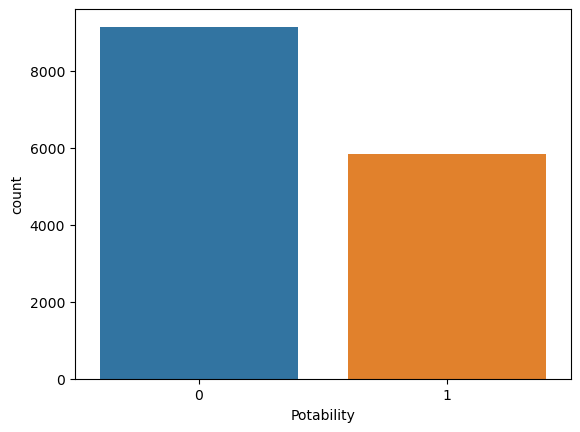

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = df["Potability"])
plt.show()

In [80]:
potability_counts = df['Potability'].value_counts()

print("Number of Non-Potable records:", potability_counts[0])
print("Number of Potable records:", potability_counts[1])

Number of Non-Potable records: 9149
Number of Potable records: 5851


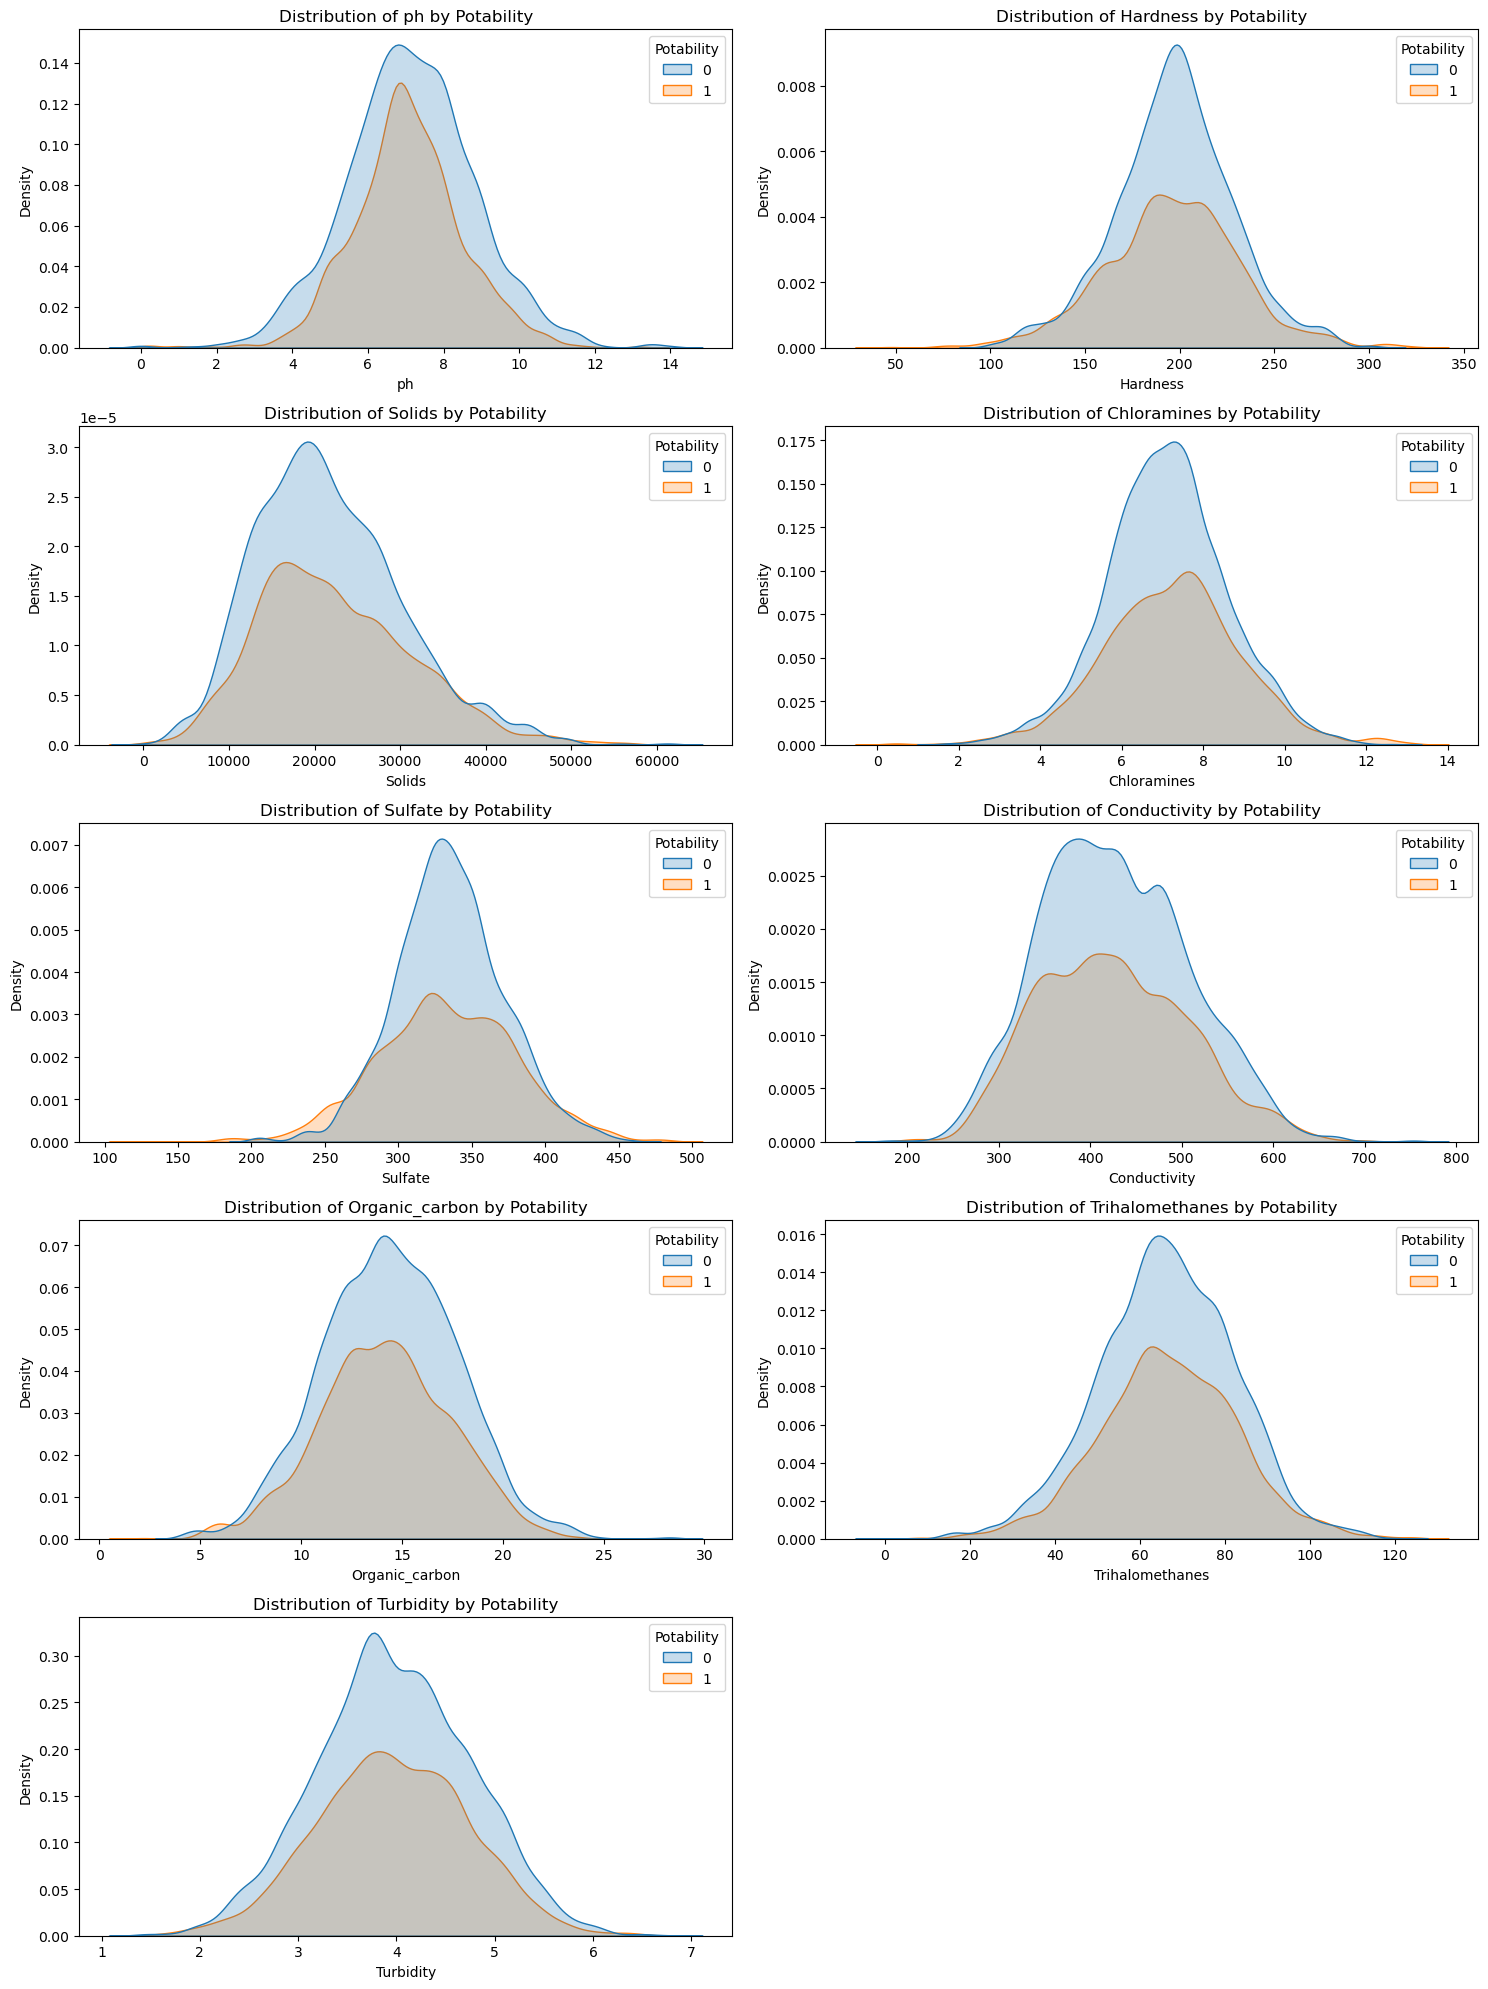

In [81]:
# Plot distributions for each numerical column grouped by 'Potability'
numerical_columns = df.columns[:-1]  # All columns except 'Potability'

plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df, x=column, hue='Potability', fill=True)
    plt.title(f'Distribution of {column} by Potability')

plt.tight_layout()
plt.show()

In [82]:
# Let's check which parameters are correlated with "Potability".
df_corr = df.corr()
df_corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.041999
Chloramines        0.036860
Trihalomethanes    0.013450
Turbidity         -0.009210
Conductivity      -0.014633
Hardness          -0.021018
ph                -0.023385
Sulfate           -0.023644
Organic_carbon    -0.038729
Name: Potability, dtype: float64

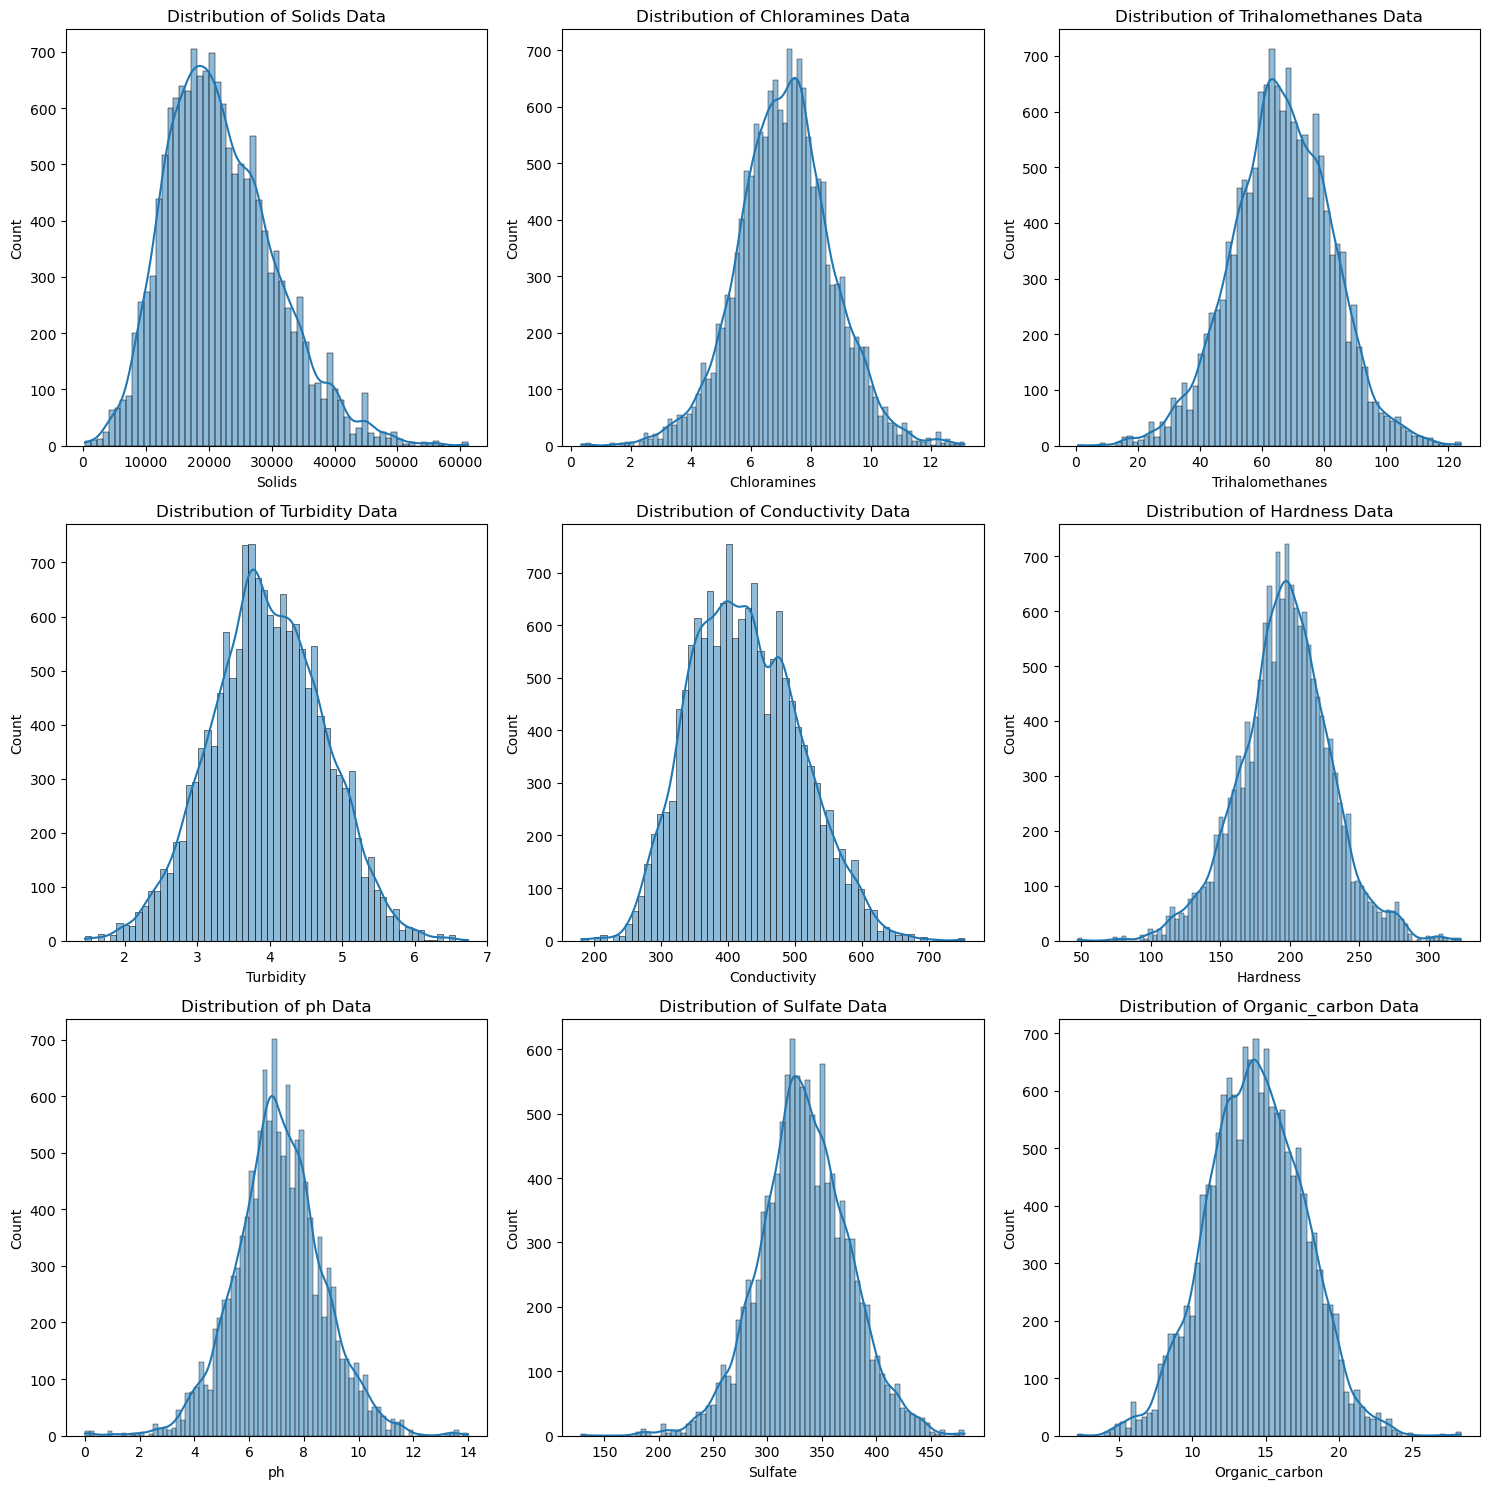

In [83]:
plt.figure(figsize=(15, 15))
df_corr_plot = df_corr["Potability"].sort_values(ascending = False)
# Loop through the sorted correlations and plot
for i, col in enumerate(df_corr_plot.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} Data")

# Apply tight layout once, after all subplots have been created
plt.tight_layout()
plt.show()

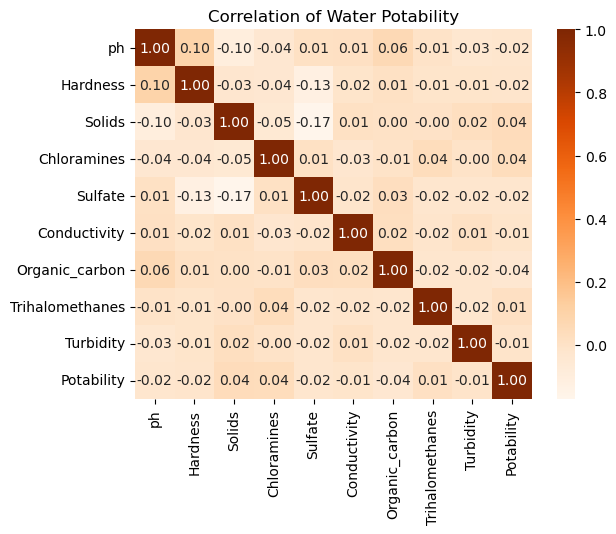

In [84]:
sns.heatmap(df.corr(), cmap = 'Oranges', annot = True, fmt = '.2f')
plt.title("Correlation of Water Potability")
plt.show()

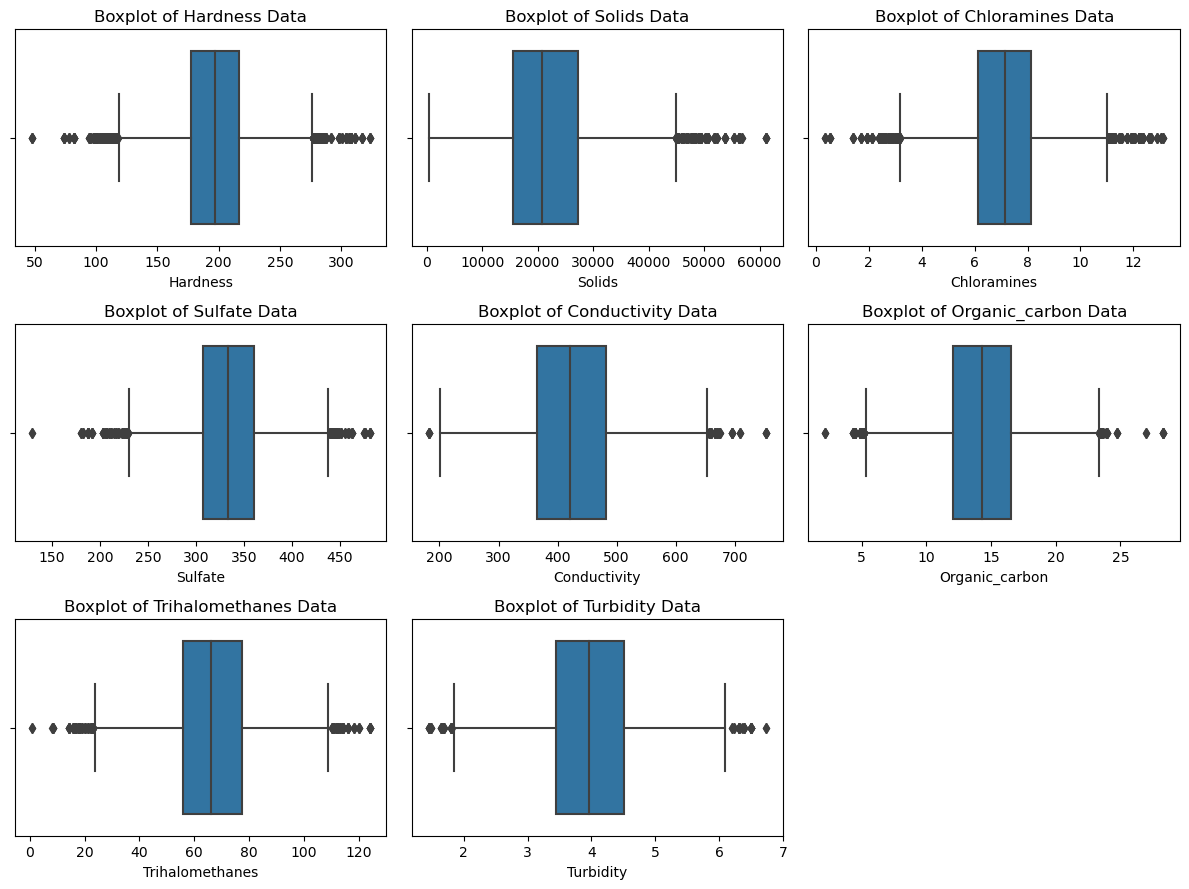

In [85]:
plt.figure(figsize=(12, 9))

# Loop through each column (excluding the first and last one) and plot a boxplot
for i, col in enumerate(df.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])  # Plot boxplot for each column
    plt.title(f"Boxplot of {col} Data")

# Apply tight layout once after all subplots are created
plt.tight_layout()
plt.show()

In [86]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Apply the function to each numeric column in the DataFrame
outliers_count = df.apply(count_outliers)

# Print the count of outliers for each column
print(outliers_count)

ph                 232
Hardness           383
Solids             205
Chloramines        290
Sulfate            166
Conductivity        50
Organic_carbon      99
Trihalomethanes    144
Turbidity           58
Potability           0
dtype: int64


In [87]:
df_new.sample()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
4886,7.443189,193.124799,13551.953345,4.313265,NaN,430.487296,19.396329,72.075586,2.664833,1


In [88]:
# Delete rows which have NaN.
df_new.dropna(axis = 0, inplace = True)
df_new

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.777665,233.761579,16780.116147,6.123297,323.538055,520.285094,17.794741,60.343891,4.683335,1
1,7.221689,203.069029,13703.220377,7.823612,352.124567,412.320490,16.125741,80.058877,3.160818,1
2,4.959853,215.854869,9887.830755,6.954231,379.504731,527.479694,14.326638,52.388849,3.455045,1
3,6.658834,182.389559,16828.880597,7.071299,355.896890,434.658981,16.618053,69.412284,3.969740,1
4,6.336457,185.680004,25927.265432,8.199318,321.817662,490.972426,10.665799,51.552301,4.561220,1
...,...,...,...,...,...,...,...,...,...,...
14994,8.651390,154.546949,15901.285161,6.510980,419.216305,444.843584,14.656725,49.515175,3.266410,0
14995,9.135694,194.815618,9496.910354,6.185925,345.714206,562.771467,13.676435,74.424166,3.281802,0
14996,8.522568,208.133000,16446.328050,6.729775,372.503843,346.374598,12.002178,80.758618,3.358284,0
14997,6.336343,214.071982,14619.627261,6.584414,315.996793,370.795604,12.219411,83.668879,3.788803,0


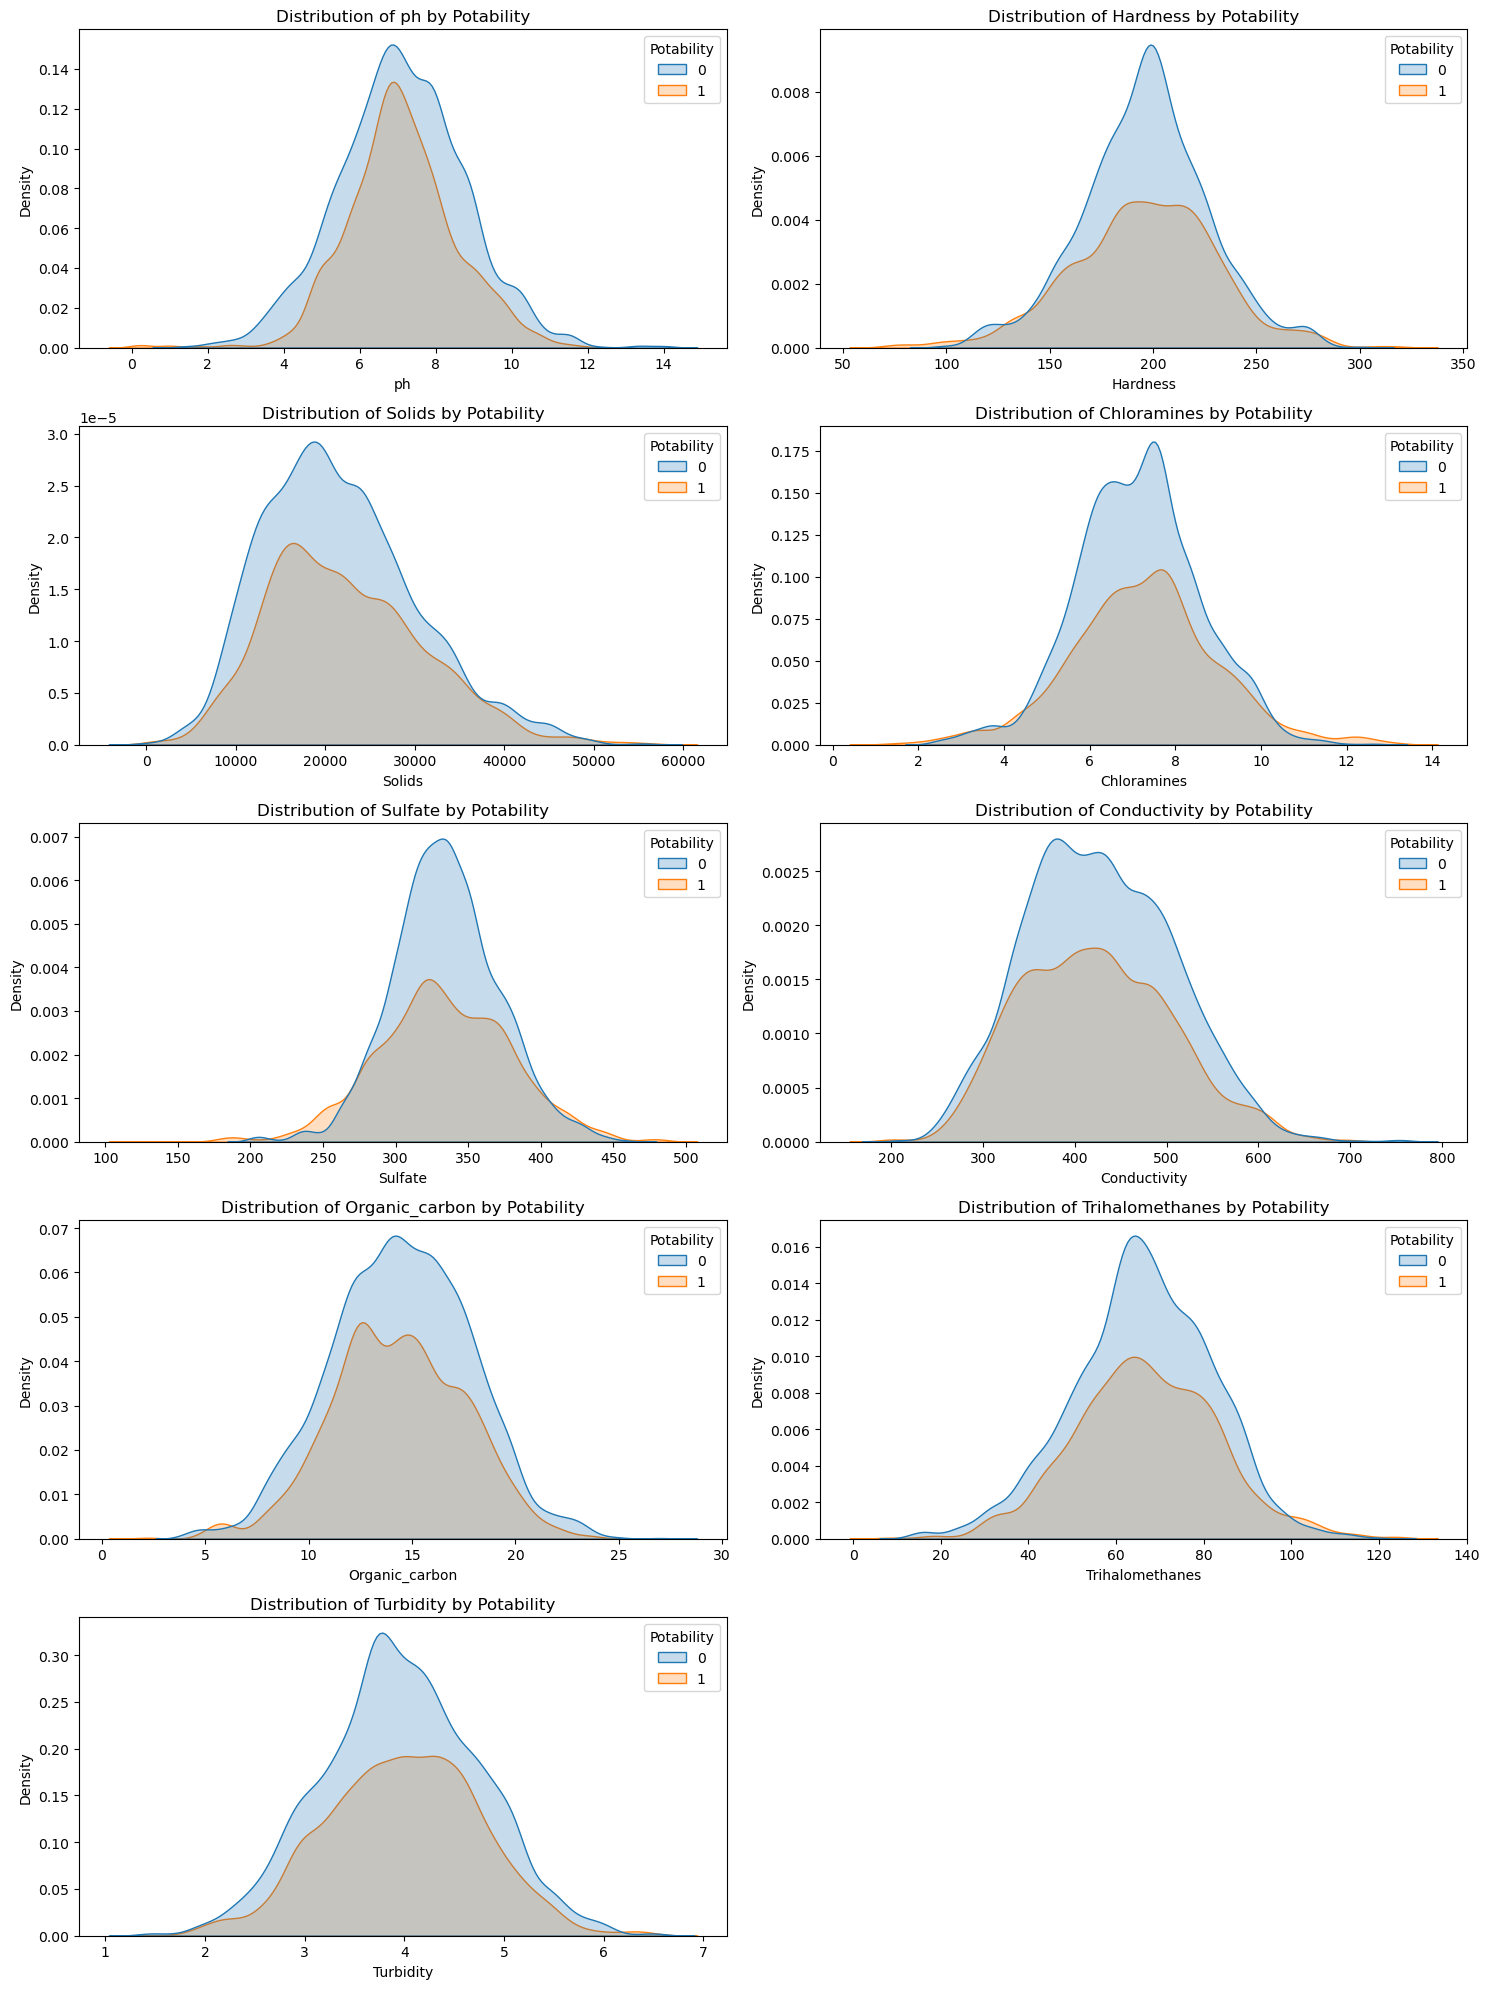

In [89]:
# Plot distributions for each numerical column grouped by 'Potability'
numerical_columns = df_new.columns[:-1]  # All columns except 'Potability'

plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df_new, x=column, hue='Potability', fill=True)
    plt.title(f'Distribution of {column} by Potability')

plt.tight_layout()
plt.show()

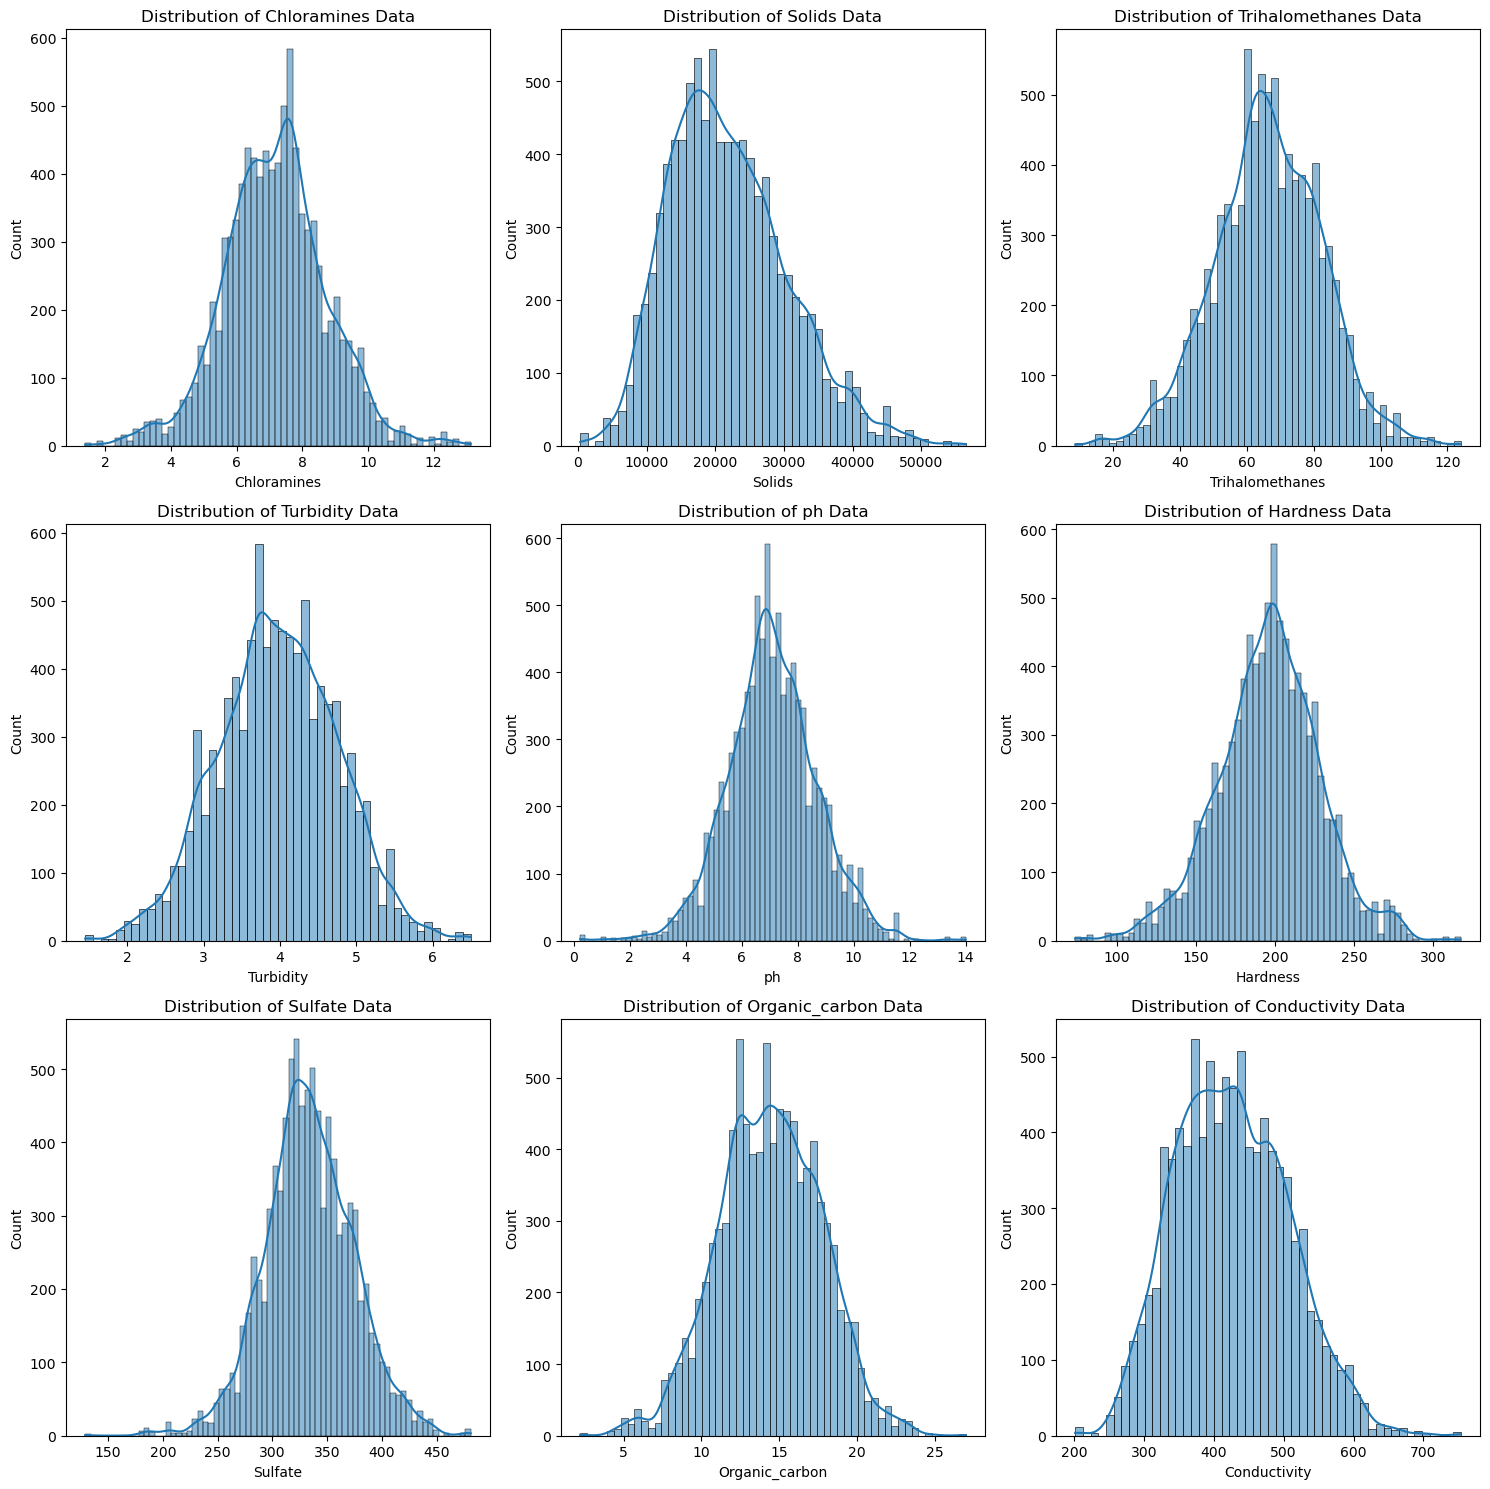

In [90]:
# Let's check which parameters are correlated with "Potability".
df_corr = df_new.corr()
df_corr["Potability"].sort_values(ascending = False)

plt.figure(figsize=(15, 15))

df_corr_plot = df_corr["Potability"].sort_values(ascending = False)
# Loop through the sorted correlations and plot
for i, col in enumerate(df_corr_plot.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_new[col], kde=True)
    plt.title(f"Distribution of {col} Data")

# Apply tight layout once, after all subplots have been created
plt.tight_layout()
plt.show()

In [91]:
df_new_mean = df.fillna(df.mean())

In [92]:
print(df_new_mean.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


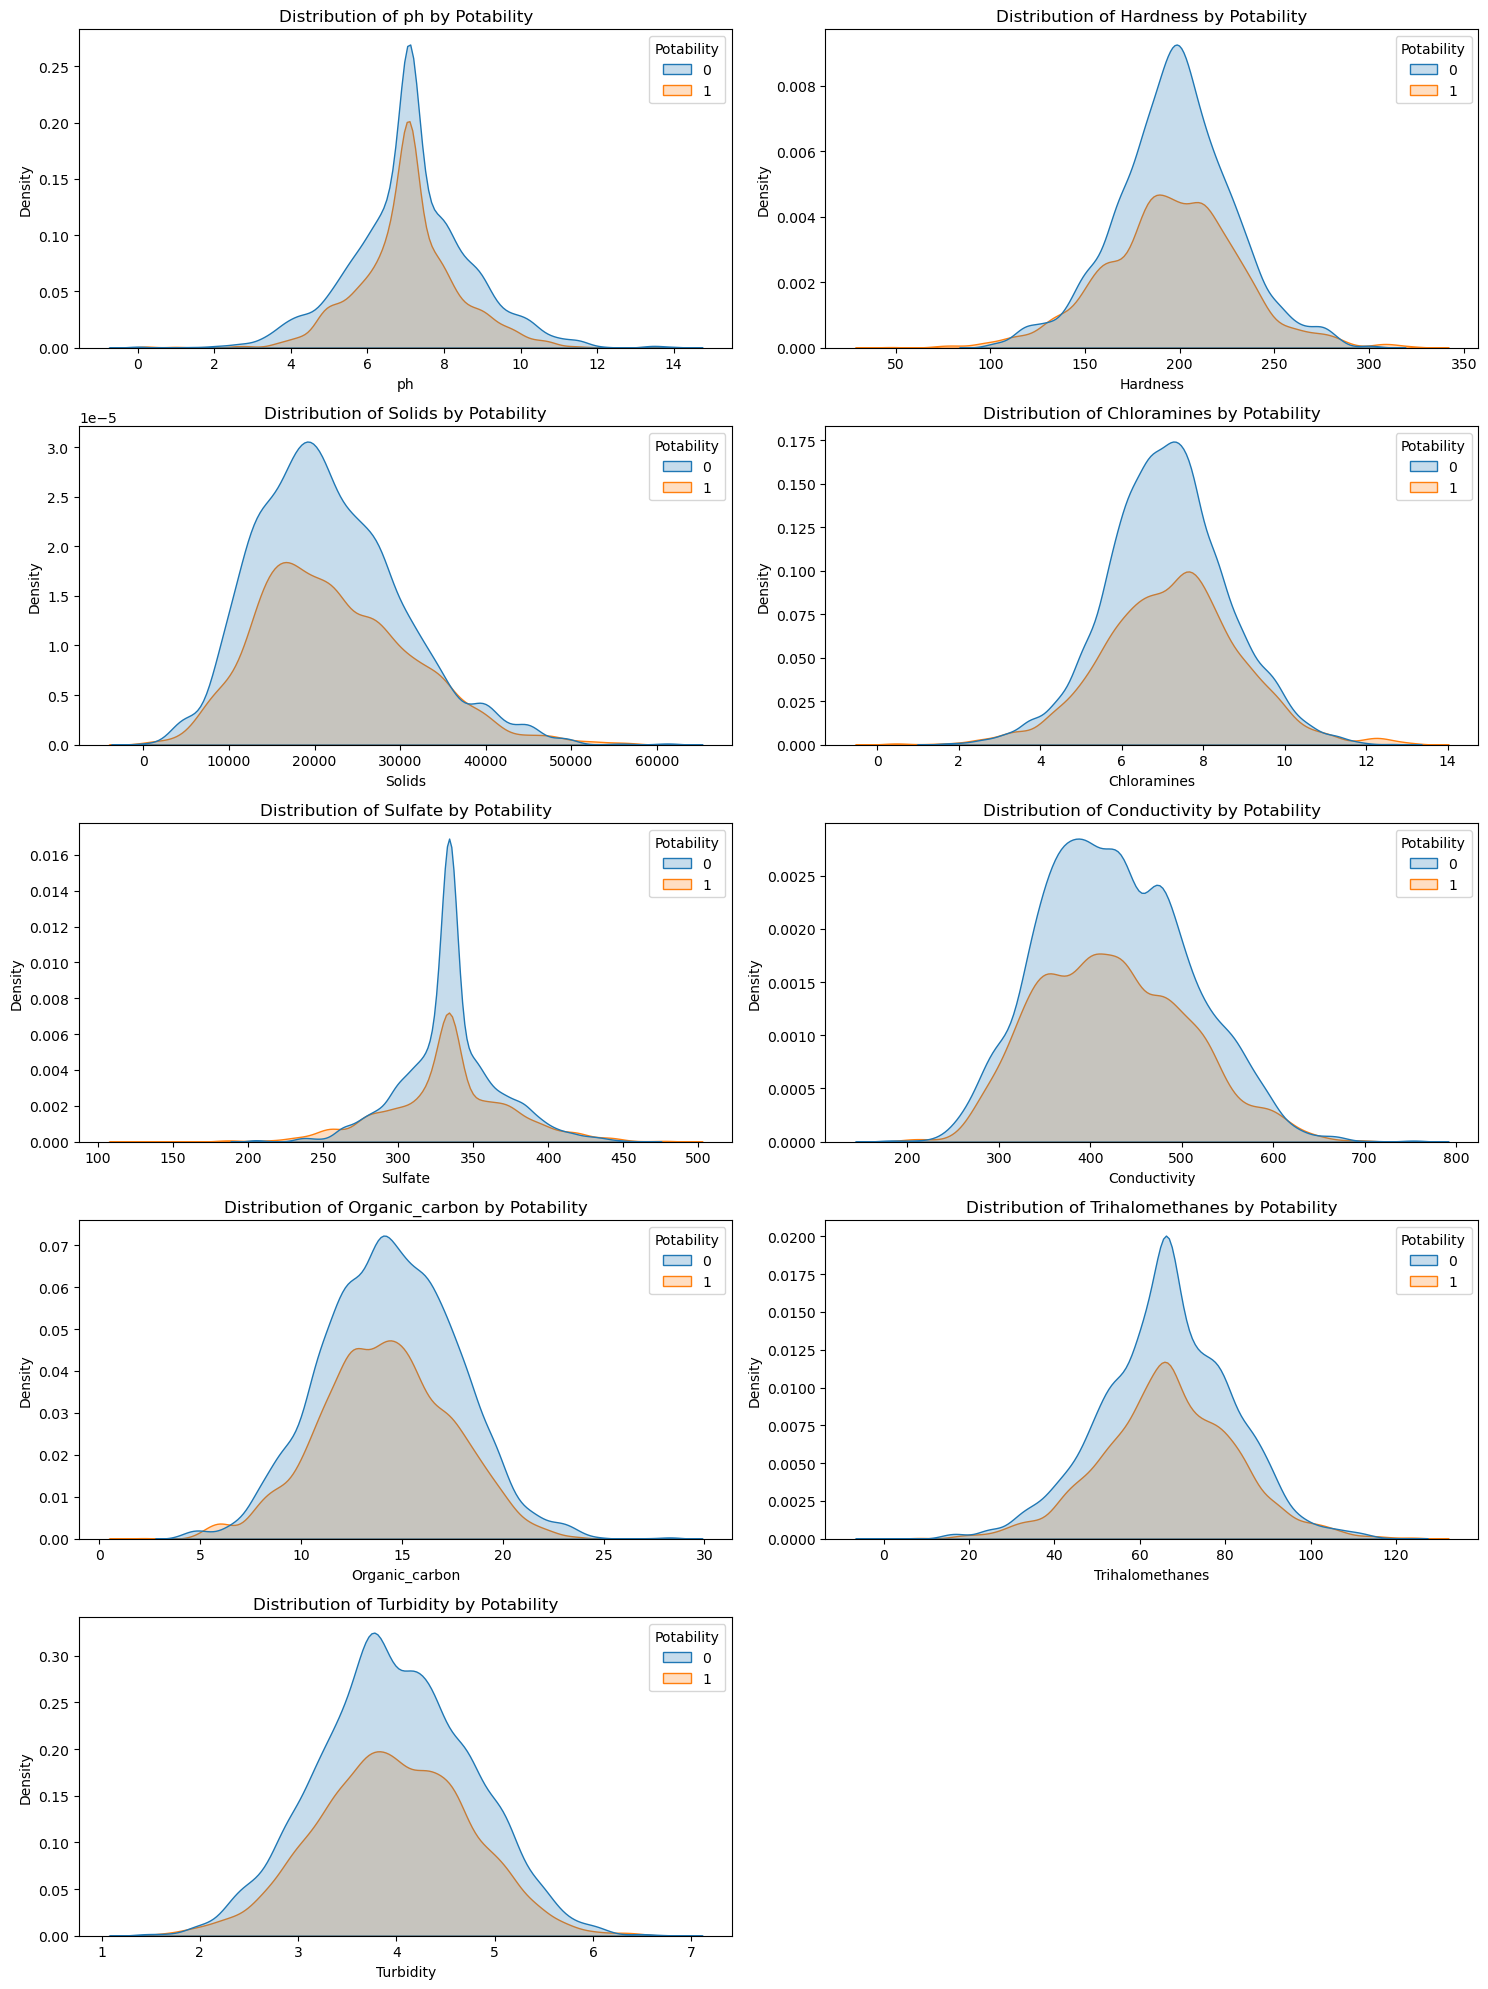

In [93]:
# Plot distributions for each numerical column grouped by 'Potability'
numerical_columns = df_new_mean.columns[:-1]  # All columns except 'Potability'

plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df_new_mean, x=column, hue='Potability', fill=True)
    plt.title(f'Distribution of {column} by Potability')

plt.tight_layout()
plt.show()

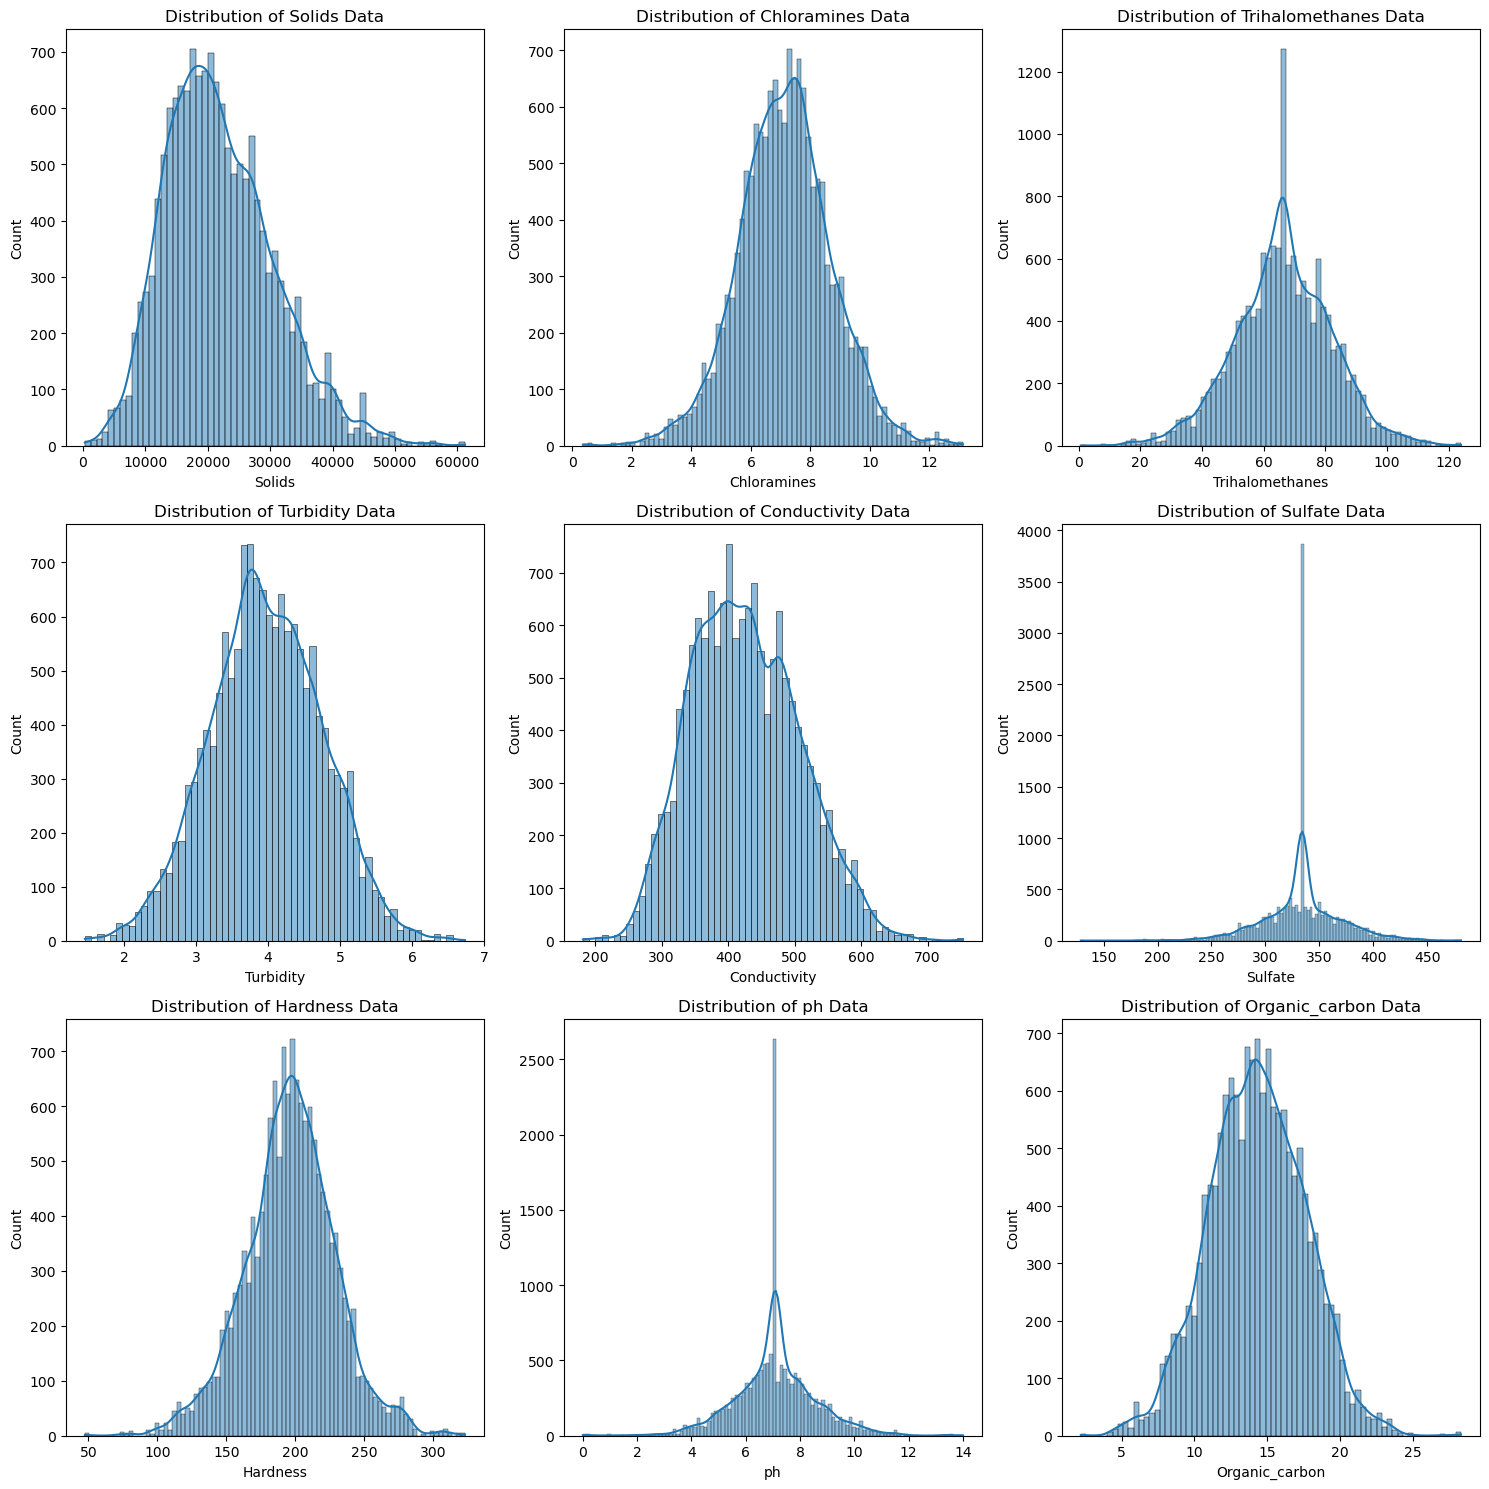

In [94]:
# Let's check which parameters are correlated with "Potability".
df_corr = df_new_mean.corr()
df_corr["Potability"].sort_values(ascending = False)

plt.figure(figsize=(15, 15))

df_corr_plot = df_corr["Potability"].sort_values(ascending = False)
# Loop through the sorted correlations and plot
for i, col in enumerate(df_corr_plot.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_new_mean[col], kde=True)
    plt.title(f"Distribution of {col} Data")

# Apply tight layout once, after all subplots have been created
plt.tight_layout()
plt.show()

In [95]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Impute missing values
df_new_knn = pd.DataFrame(imputer.fit_transform(df_new_knn), columns=df_new_knn.columns)

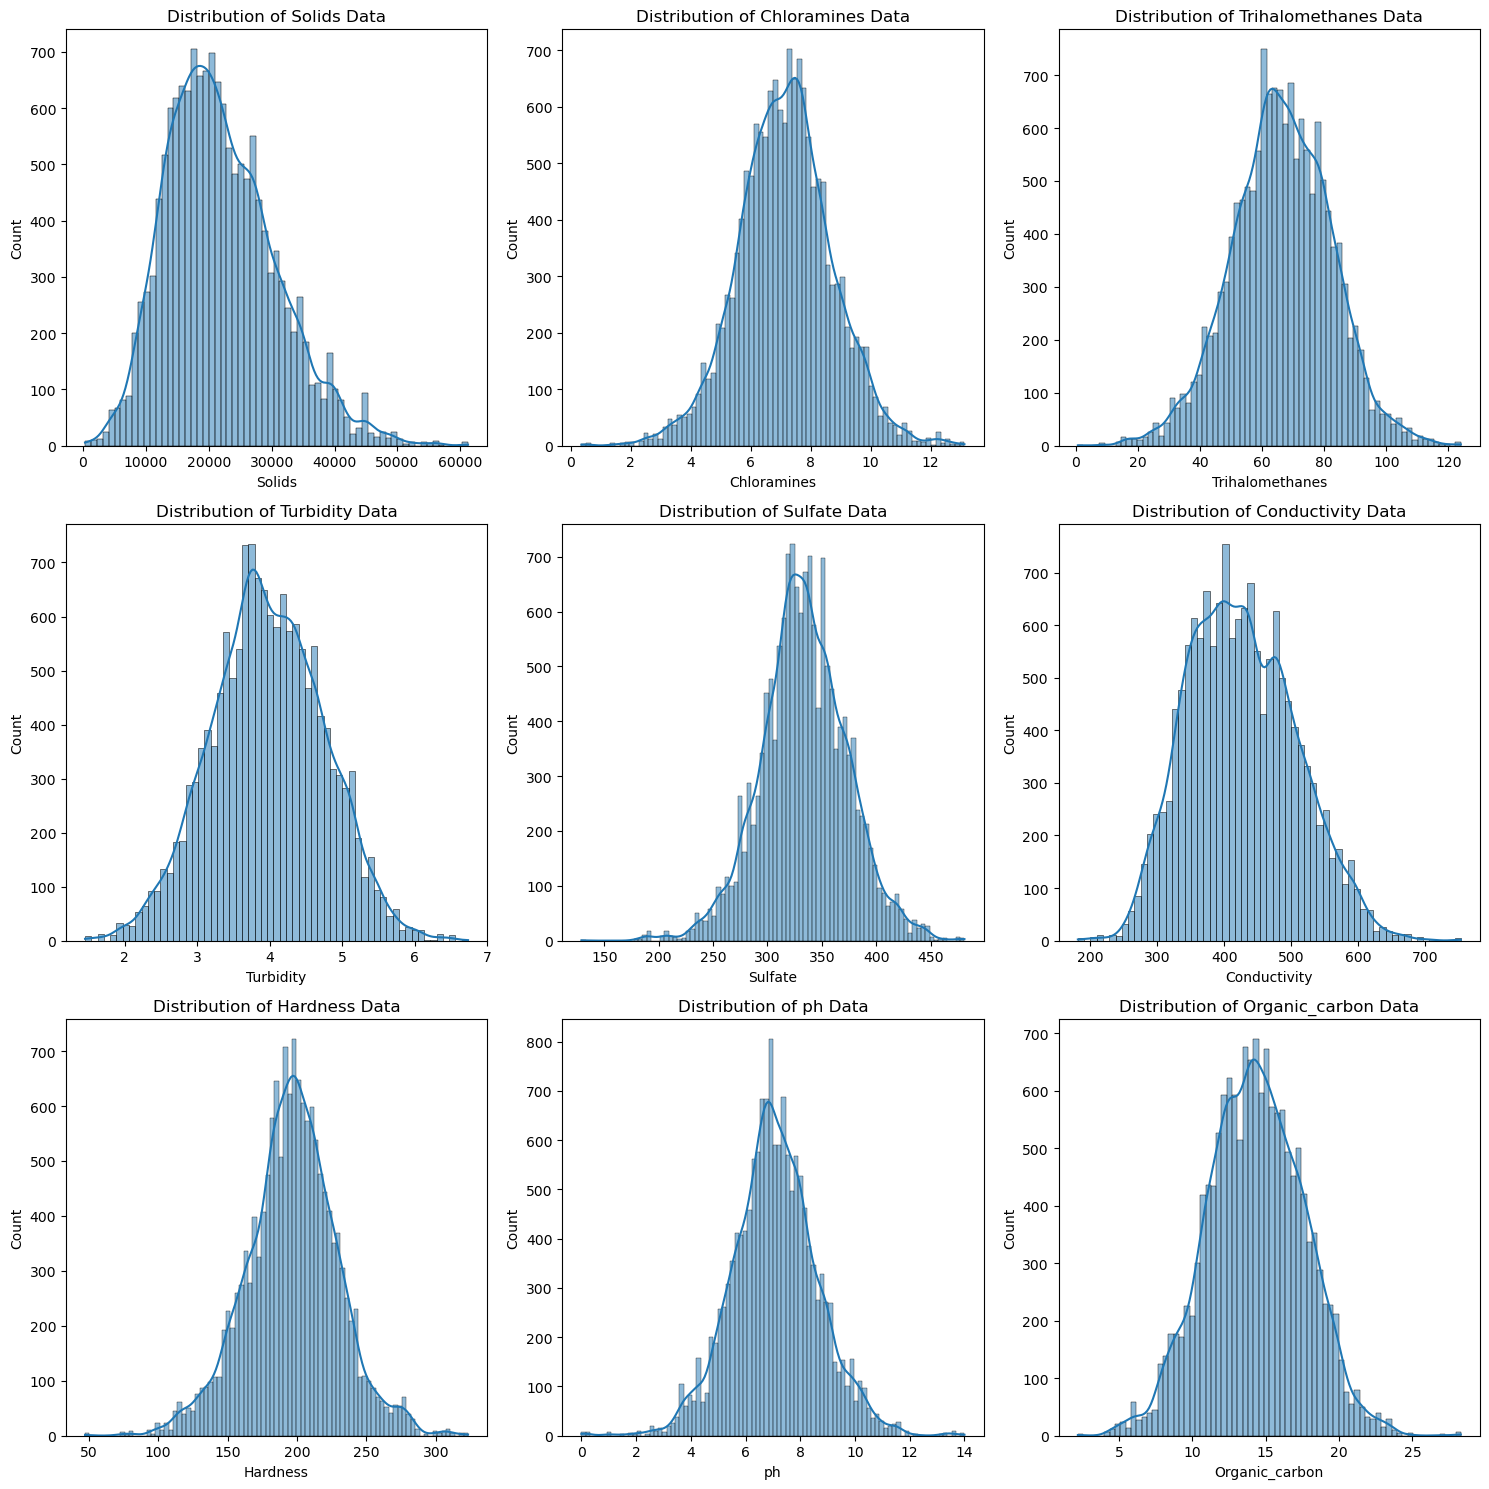

In [96]:
# Let's check which parameters are correlated with "Potability".
df_corr = df_new_knn.corr()
df_corr["Potability"].sort_values(ascending = False)

plt.figure(figsize=(15, 15))

df_corr_plot = df_corr["Potability"].sort_values(ascending = False)
# Loop through the sorted correlations and plot
for i, col in enumerate(df_corr_plot.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_new_knn[col], kde=True)
    plt.title(f"Distribution of {col} Data")

# Apply tight layout once, after all subplots have been created
plt.tight_layout()
plt.show()

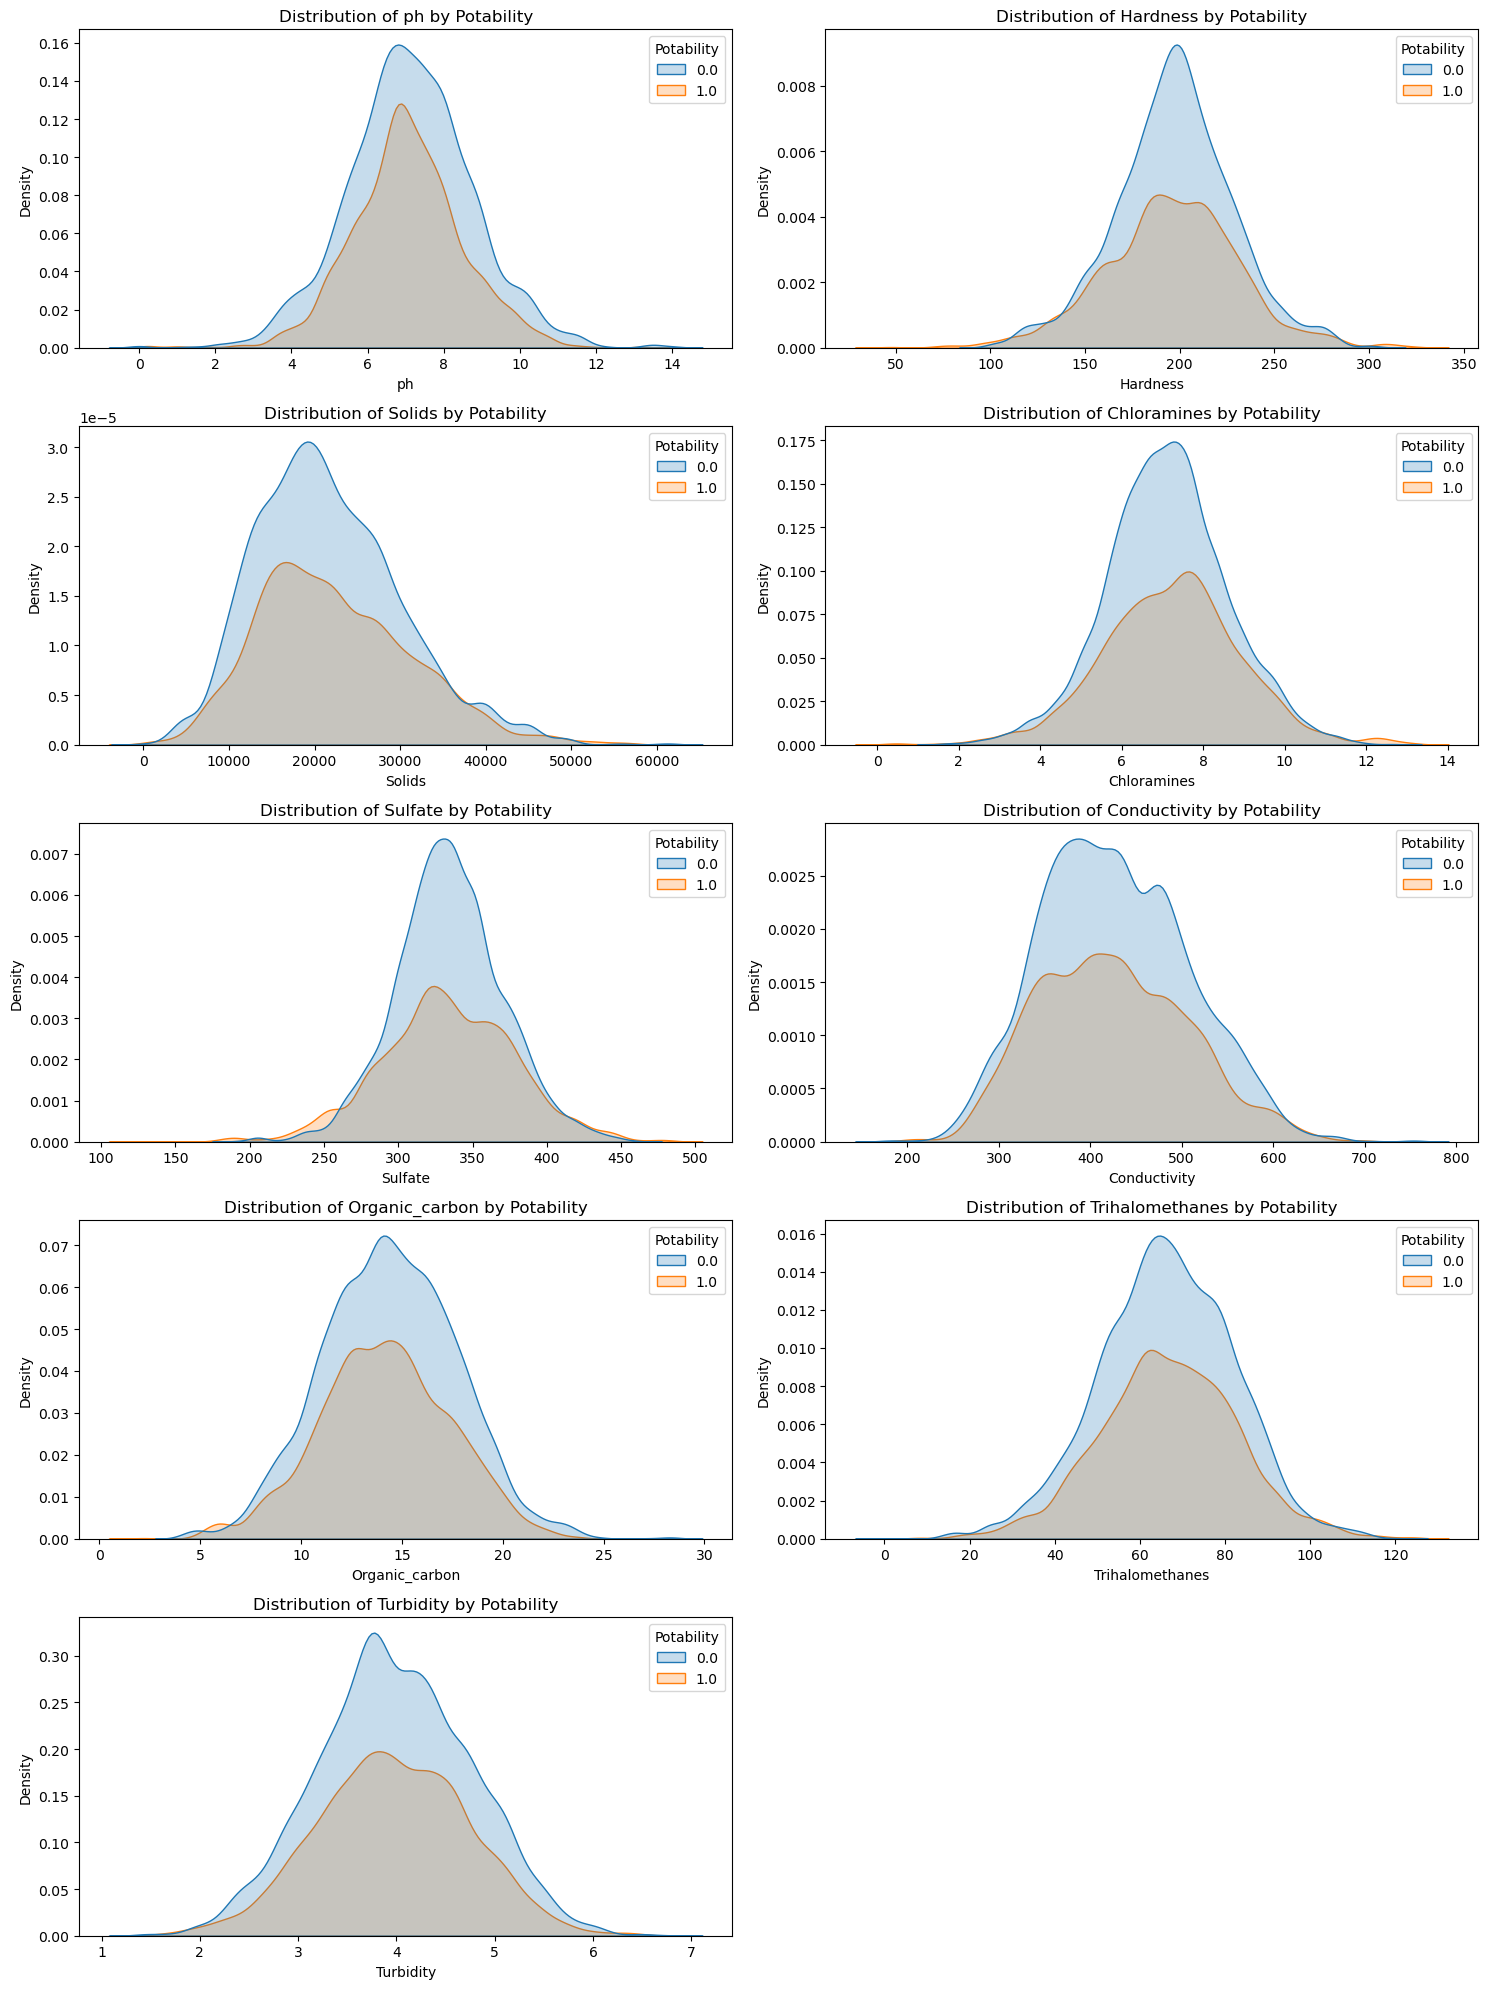

In [97]:
# Plot distributions for each numerical column grouped by 'Potability'
numerical_columns = df_new_knn.columns[:-1]  # All columns except 'Potability'

plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(data=df_new_knn, x=column, hue='Potability', fill=True)
    plt.title(f'Distribution of {column} by Potability')

plt.tight_layout()
plt.show()

In [98]:
final_df = df_new_knn.copy()

KNN Imputation works.

In [99]:
# Capping outliers at 5th and 95th percentiles
lower_bound = final_df.quantile(0.03)
upper_bound = final_df.quantile(0.97)

final_df = final_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

[]

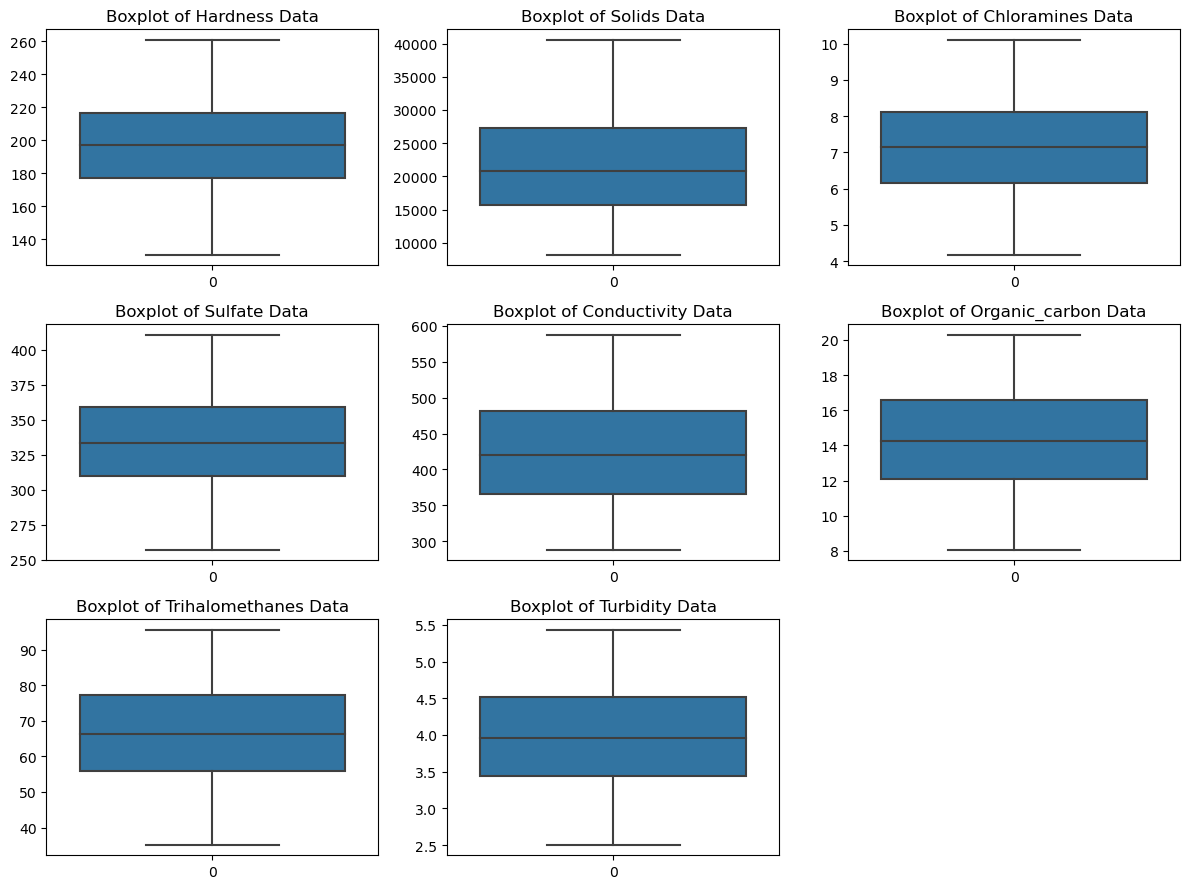

In [100]:
plt.figure(figsize = (12, 9))
for i, col in enumerate(final_df.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(final_df[col])
    plt.title(f"Boxplot of {col} Data")
plt.tight_layout()
plt.plot()

In [101]:
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

# Convert scaled array back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=final_df.columns)

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler and transform the data
scaled_data = scaler.fit_transform(df_scaled)

# Convert back to DataFrame
final_df = pd.DataFrame(scaled_data, columns=df_scaled.columns)


In [103]:
# Save the final_df DataFrame to a CSV file
final_df.to_csv('final_df1.csv', index=False)  # index=False to avoid saving the index column